# Inspecting the Detected Bounding Boxes

## After Applying MTCNN on CelebA

In [1]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from tqdm import tqdm
import matplotlib.patches as patches

In [24]:
image_dir = "/home/stud/m/mc085/mounted_home/dinov2/dinov2/data/datasets/CelebA/CelebA_original"
bbox_csv_path = "/home/stud/m/mc085/mounted_home/dinov2/dinov2/data/datasets/CelebA/list_bbox_celeba_mtcnn.csv"

bbox_df = pd.read_csv(bbox_csv_path)

In [25]:
def display_image_with_bbox(image_id: str):
    image_path = os.path.join(image_dir, image_id)
    img = Image.open(image_path)

    bbox = bbox_df[bbox_df["image_id"] == image_id]
    if bbox.empty:
        print(f"No bounding box found for {image_id}")
        return

    x, y, width, height = bbox.iloc[0][["x_1", "y_1", "width", "height"]]

    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(img)
    rect = patches.Rectangle(
        (x, y), width, height, linewidth=2, edgecolor="r", facecolor="none"
    )
    ax.add_patch(rect)
    ax.set_title(f"Image: {image_id}")
    plt.axis("off")
    plt.show()

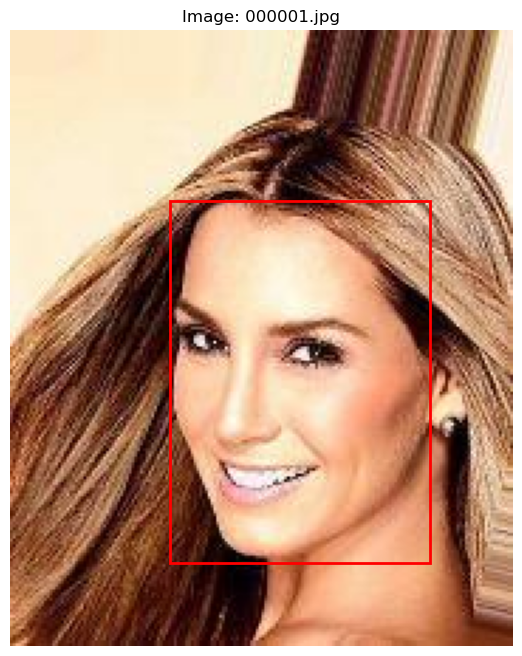

In [26]:
example_image_id = bbox_df["image_id"].iloc[0]
display_image_with_bbox(example_image_id)

### Some faces were not recognized by MTCNN. Examples below.

In [8]:
def display_image_by_name(image_id: str):
    image_path = os.path.join(image_dir, image_id)
    img = Image.open(image_path)

    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(img)
    ax.set_title(f"Image: {image_id}")
    plt.axis("off")
    plt.show()

In [28]:
all_images = set(
        sorted(f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.png')))
    )
bbox_df = pd.read_csv(bbox_csv_path)
recognized_images = set(bbox_df['image_id'])
unrecognized_images = list(all_images - recognized_images)
unrecognized_images = sorted(unrecognized_images)

In [29]:
print(f"Unrecognized images ({len(unrecognized_images)}): {unrecognized_images}")

Unrecognized images (782): ['000120.jpg', '000149.jpg', '000199.jpg', '000627.jpg', '000901.jpg', '001401.jpg', '002432.jpg', '002583.jpg', '002779.jpg', '002920.jpg', '003400.jpg', '003626.jpg', '003723.jpg', '003854.jpg', '003928.jpg', '003946.jpg', '004118.jpg', '004602.jpg', '004700.jpg', '004732.jpg', '004889.jpg', '004932.jpg', '005057.jpg', '005198.jpg', '005338.jpg', '006010.jpg', '006531.jpg', '006721.jpg', '007037.jpg', '007087.jpg', '007581.jpg', '007726.jpg', '007917.jpg', '007959.jpg', '007996.jpg', '008181.jpg', '008574.jpg', '009119.jpg', '009259.jpg', '010091.jpg', '011060.jpg', '011646.jpg', '011793.jpg', '012306.jpg', '012629.jpg', '012772.jpg', '013374.jpg', '013654.jpg', '014577.jpg', '014769.jpg', '014823.jpg', '014999.jpg', '015026.jpg', '015549.jpg', '015821.jpg', '016293.jpg', '016303.jpg', '016530.jpg', '017009.jpg', '017171.jpg', '017282.jpg', '018205.jpg', '018309.jpg', '018599.jpg', '018654.jpg', '018946.jpg', '018991.jpg', '019205.jpg', '019377.jpg', '01940

In [30]:
percentage_unrecognized = (len(unrecognized_images) / len(all_images)) * 100
print(f"Percentage of unrecognized images: {percentage_unrecognized:.2f}%") 

Percentage of unrecognized images: 0.39%


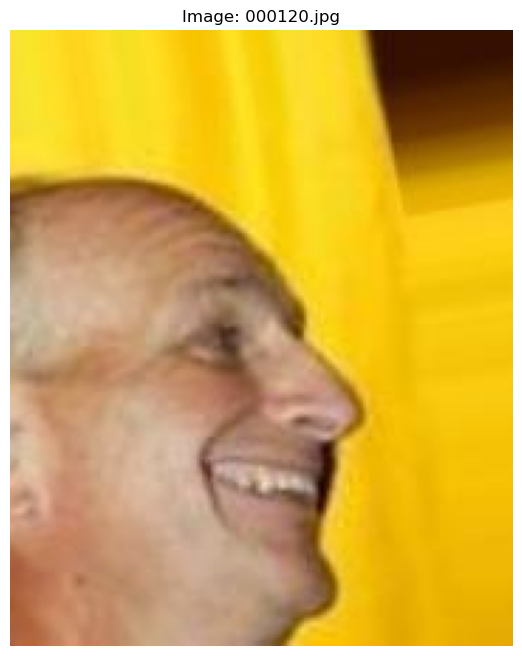

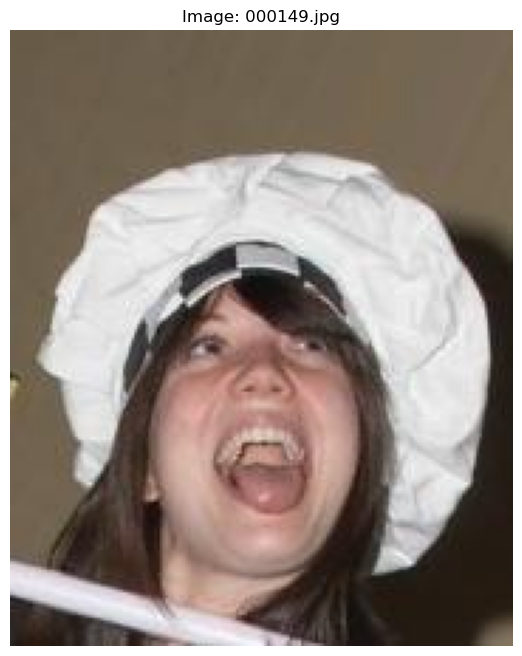

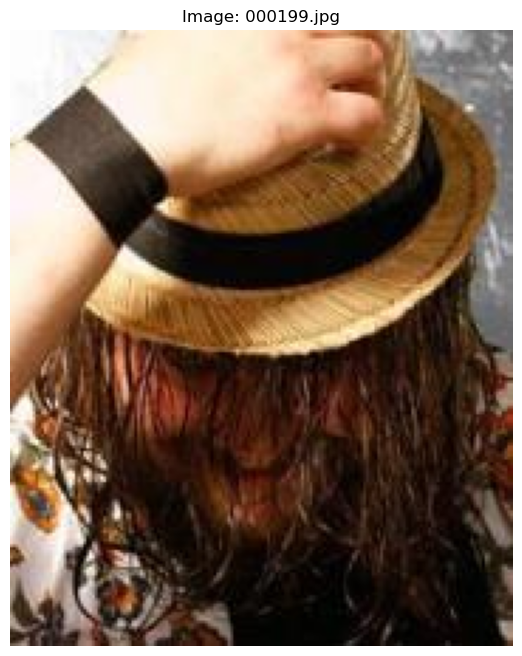

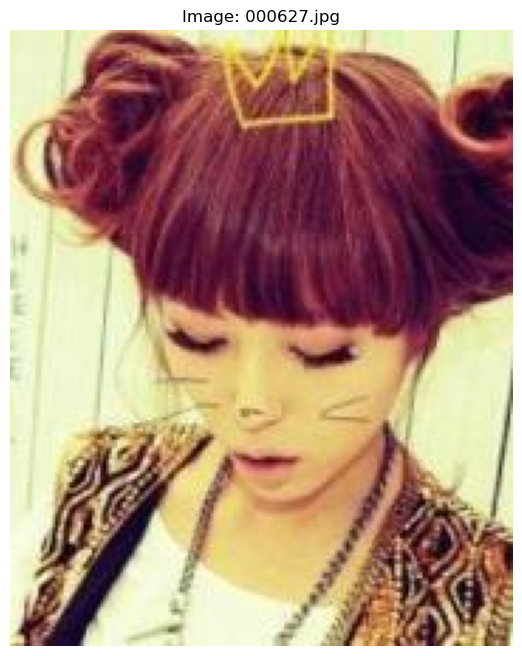

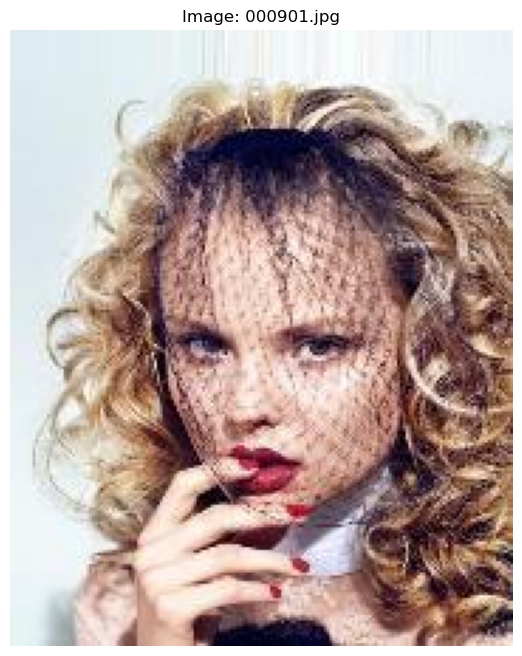

In [31]:
display_image_by_name(unrecognized_images[0])
display_image_by_name(unrecognized_images[1])
display_image_by_name(unrecognized_images[2])
display_image_by_name(unrecognized_images[3])
display_image_by_name(unrecognized_images[4])

### Sort Out Unrecognized Faces

In [10]:
sorted_out_dir = "/home/stud/m/mc085/mounted_home/dinov2/dinov2/data/datasets/CelebA/CelebA_sorted_out"

In [12]:
def move_unrecognized_images():
    bbox_df = pd.read_csv(bbox_csv_path)
    recognized_images = set(bbox_df['image_id'])

    all_images = set(
        f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.png'))
    )
    unrecognized_images = all_images - recognized_images
    os.makedirs(sorted_out_dir, exist_ok=True)

    for image in unrecognized_images:
        source_path = os.path.join(image_dir, image)
        destination_path = os.path.join(sorted_out_dir, image)
        try:
            shutil.move(source_path, destination_path)
            print(f"Moved: {image}")
        except Exception as e:
            print(f"Error moving {image}: {e}")

    print(f"Finished moving {len(unrecognized_images)} unrecognized images to {sorted_out_dir}.")


In [13]:
def move_unrecognized_images_back():
    os.makedirs(image_dir, exist_ok=True)
    images = [f for f in os.listdir(sorted_out_dir) if f.lower().endswith(('.jpg', '.png'))]

    for image in images:
        source_path = os.path.join(sorted_out_dir, image)
        destination_path = os.path.join(image_dir, image)
        try:
            shutil.move(source_path, destination_path)
            print(f"Moved back: {image}")
        except Exception as e:
            print(f"Error moving {image} back: {e}")

    print(f"Finished moving {len(images)} images back to {image_dir}.")

In [32]:
move_unrecognized_images()
# move_unrecognized_images_back()

Moved: 028580.jpg
Moved: 103934.jpg
Moved: 154579.jpg
Moved: 151176.jpg
Moved: 055657.jpg
Moved: 191321.jpg
Moved: 080628.jpg
Moved: 139996.jpg
Moved: 152466.jpg
Moved: 157701.jpg
Moved: 109894.jpg
Moved: 027468.jpg
Moved: 164481.jpg
Moved: 033216.jpg
Moved: 113243.jpg
Moved: 074844.jpg
Moved: 077942.jpg
Moved: 063507.jpg
Moved: 040320.jpg
Moved: 074618.jpg
Moved: 067190.jpg
Moved: 024850.jpg
Moved: 187721.jpg
Moved: 102061.jpg
Moved: 057435.jpg
Moved: 072776.jpg
Moved: 171573.jpg
Moved: 137880.jpg
Moved: 182021.jpg
Moved: 084472.jpg
Moved: 142324.jpg
Moved: 018946.jpg
Moved: 027556.jpg
Moved: 155843.jpg
Moved: 145009.jpg
Moved: 045991.jpg
Moved: 106765.jpg
Moved: 030912.jpg
Moved: 008181.jpg
Moved: 037125.jpg
Moved: 071773.jpg
Moved: 032108.jpg
Moved: 157304.jpg
Moved: 048799.jpg
Moved: 043571.jpg
Moved: 145374.jpg
Moved: 133222.jpg
Moved: 031125.jpg
Moved: 008574.jpg
Moved: 154288.jpg
Moved: 061568.jpg
Moved: 044503.jpg
Moved: 133476.jpg
Moved: 086585.jpg
Moved: 153506.jpg
Moved: 004

## After Applying PaddleOCR on RVL-CDIP

In [29]:
# paddleocr not set up on vscode-container yet.
# from paddleocr import draw_ocr 
# import cv2

In [2]:
import json
import numpy as np

In [3]:
image_dir = "/home/stud/m/mc085/mounted_home/dinov2/dinov2/data/datasets/RVL-CDIP/RVL-CDIP_original/train"
bbox_json_path = "/home/stud/m/mc085/mounted_home/dinov2/dinov2/data/datasets/RVL-CDIP/list_bboxes_rvl_cdip_train_100_paddle_ocr.json"

In [4]:
with open(bbox_json_path, "r") as f:
    bbox_data = json.load(f)

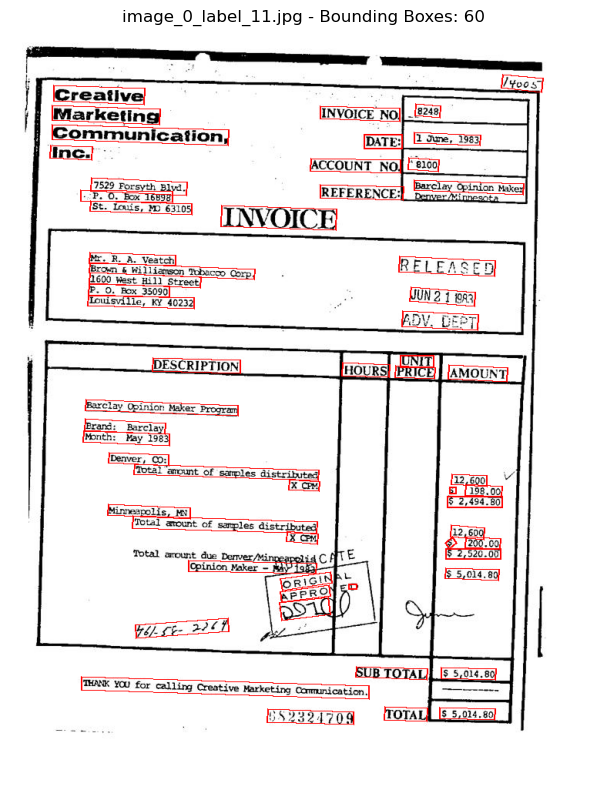

In [7]:
first_image_name = os.listdir(image_dir)[0]
first_image_path = os.path.join(image_dir, first_image_name)

if first_image_name in bbox_data:
    bboxes = bbox_data[first_image_name]["bbs"]
    original_bbox_count = bbox_data[first_image_name]["original_bbs_count"]
else:
    raise ValueError(f"Bounding boxes for {first_image_name} not found in JSON file.")

image = Image.open(first_image_path).convert("RGB")
draw = ImageDraw.Draw(image)

for box in bboxes:
    # see https://github.com/Mushroomcat9998/PaddleOCR/blob/main/tools/infer/utility.py#L208
    reshaped_box = np.reshape(np.array(box), (-1, 2)).astype(np.int64)
    polygon = [(x, y) for x, y in reshaped_box]

    draw.polygon(polygon, outline="red", width=2)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title(f"{first_image_name} - Bounding Boxes: {original_bbox_count}")
plt.axis("off")
plt.show()

### Some bbs were not recognized by PaddleOCR. Examples below.

In [15]:
# taken from logs: anonymize-rvl-cdip-train-mask-out-100-21535.out
unrecognized = ["image_5430_label_8.jpg", "image_5546_label_8.jpg", "image_7925_label_8.jpg", "image_32242_label_8.jpg", "image_10617_label_6.jpg", "image_6123_label_6.jpg"]

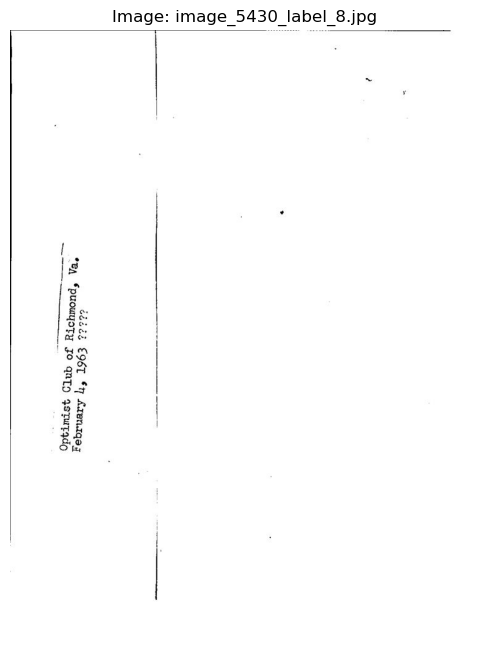

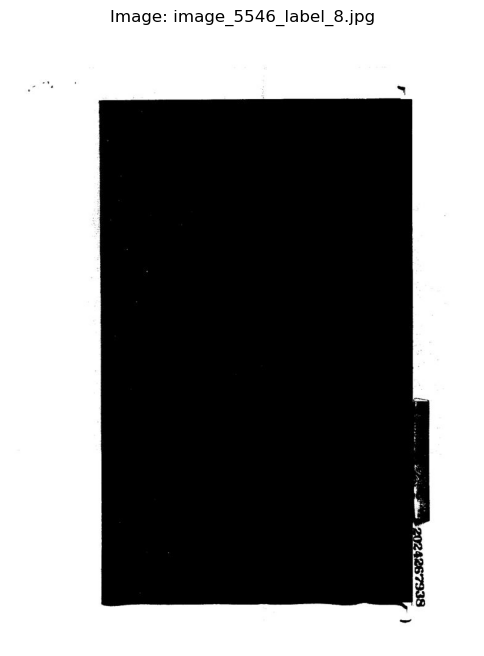

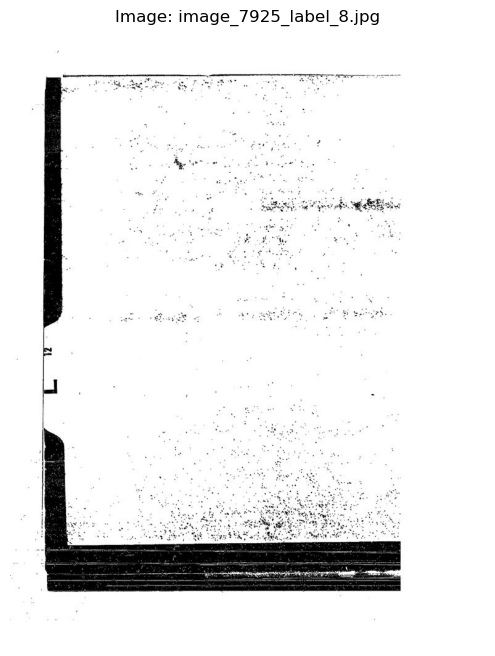

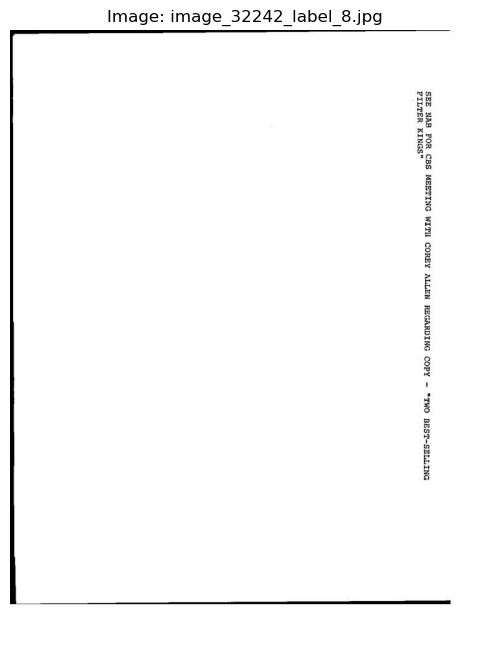

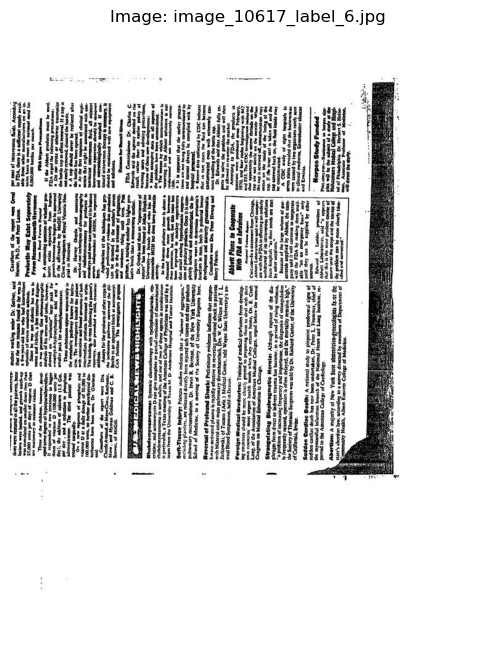

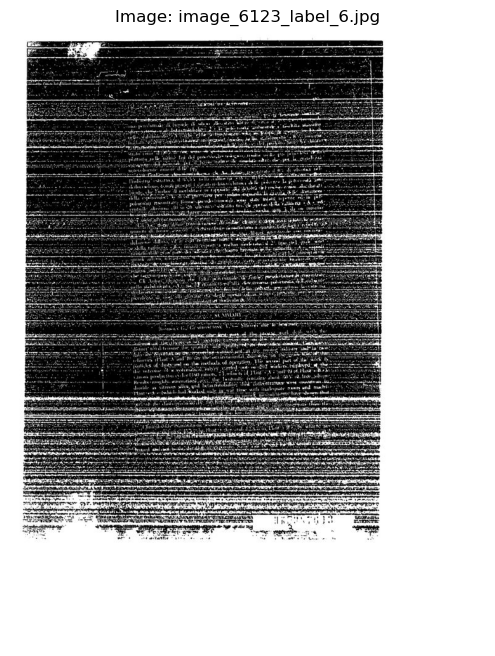

In [16]:
for image_name in unrecognized:
    display_image_by_name(image_name)

### Sort Out Unrecognized Documents

In [7]:
def remove_images_without_bbs(image_dir: str, bbox_json_path: str, sorted_out_dir: str):
    with open(bbox_json_path, "r") as f:
        bbox_data = json.load(f)

    recognized_images = set(
        img_name for img_name, bbs in bbox_data.items() if bbs.get("bbs")
    )

    all_images = set(
        f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.png'))
    )

    unrecognized_images = all_images - recognized_images
    os.makedirs(sorted_out_dir, exist_ok=True)

    for image in tqdm(unrecognized_images, desc="Removing images without BBs"):
        source_path = os.path.join(image_dir, image)
        destination_path = os.path.join(sorted_out_dir, image)

        try:
            shutil.move(source_path, destination_path)
            print(f"Moved: {image}")
        except Exception as e:
            print(f"Error moving {image}: {e}")

    print(f"Finished moving {len(unrecognized_images)} unrecognized images to {sorted_out_dir}.")

In [4]:
image_dir = "/home/stud/m/mc085/mounted_home/dinov2/dinov2/data/datasets/RVL-CDIP/RVL-CDIP_original/test"
bbox_json_path = "/home/stud/m/mc085/mounted_home/dinov2/dinov2/data/datasets/RVL-CDIP/list_bboxes_rvl_cdip_test_100_paddle_ocr.json"
sorted_out_dir = "/home/stud/m/mc085/mounted_home/dinov2/dinov2/data/datasets/RVL-CDIP/RVL-CDIP_sorted_out"

In [10]:
remove_images_without_bbs(image_dir, bbox_json_path, sorted_out_dir)

Removing images without BBs: 100%|██████████| 38/38 [00:00<00:00, 1187.47it/s]


Moved: image_758_label_8.jpg
Moved: image_9233_label_8.jpg
Moved: image_12255_label_3.jpg
Moved: image_824_label_8.jpg
Moved: image_22294_label_15.jpg
Moved: image_3777_label_8.jpg
Moved: image_6810_label_8.jpg
Moved: image_11984_label_8.jpg
Moved: image_20523_label_8.jpg
Moved: image_3604_label_3.jpg
Moved: image_10481_label_8.jpg
Moved: image_21265_label_0.jpg
Moved: image_38885_label_8.jpg
Moved: image_38372_label_8.jpg
Moved: image_9792_label_8.jpg
Moved: image_19333_label_8.jpg
Moved: image_25424_label_3.jpg
Moved: image_3428_label_8.jpg
Moved: image_4053_label_8.jpg
Moved: image_25367_label_8.jpg
Moved: image_39030_label_8.jpg
Moved: image_32694_label_8.jpg
Moved: image_3749_label_15.jpg
Moved: image_25414_label_8.jpg
Moved: image_15895_label_8.jpg
Moved: image_25516_label_8.jpg
Moved: image_18372_label_8.jpg
Moved: image_39100_label_8.jpg
Moved: image_2065_label_3.jpg
Moved: image_14980_label_8.jpg
Moved: image_9349_label_8.jpg
Moved: image_12919_label_8.jpg
Moved: image_23759_l

In [3]:
def count_images_in_directory(directory):
    return len([f for f in os.listdir(directory) if f.lower().endswith(('.jpg', '.png'))])

In [6]:
count_images_in_directory(sorted_out_dir) / 400000

0.000875